In [2]:
from cnnproject import config
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

2024-10-29 11:38:13.286 | INFO     | cnnproject.config:<module>:11 - PROJ_ROOT path is: /Users/fabd/Documents/Uni/COMP309/Project/cnnprojectcomp309


In [5]:
from loguru import logger

### Verification of Image sizes

Images of incorrect shape are outputted to a log file

In [44]:
#Check Dimensions of all images in train_data/strawberry train_data/tomato and train_data/cherry

with open(config.INTERIM_DATA_DIR / 'incorrect_img_shape_log.txt', 'w') as f:
    f.write('Incorrect image shapes\n')


for folder in os.listdir(config.RAW_DATA_DIR / 'train_data'):
    #Check folder is a directory
    if not os.path.isdir(config.RAW_DATA_DIR / 'train_data' / folder):
        continue

    for image in os.listdir(config.RAW_DATA_DIR / 'train_data' / folder):
        cvimage = cv2.imread(str(config.RAW_DATA_DIR / 'train_data' / folder / image))

        if cvimage is None:
            logger.error(f'Error reading image image in folder {folder}')
            continue
        if cvimage.shape != (300, 300, 3):
            logger.error(f'Error with shape of image at: image Shape not equal to (300, 300, 3)')
            logger.error(f'Error with shape of image at: path: {config.RAW_DATA_DIR / "train_data" / folder / image}')
            #Write to file
            with open(config.INTERIM_DATA_DIR / 'incorrect_img_shape_log.txt', 'a') as f:
                f.write(f'Image: {image} Shape: {cvimage.shape}\n')
            continue

    

2024-10-28 10:43:34.303 | ERROR    | __main__:<module>:19 - Error with shape of image at: image Shape not equal to (300, 300, 3)
2024-10-28 10:43:34.304 | ERROR    | __main__:<module>:20 - Error with shape of image at: path: /Users/fabd/Documents/Uni/COMP309/Project/cnnprojectcomp309/data/raw/train_data/strawberry/strawberry_0388.jpg
2024-10-28 10:43:34.319 | ERROR    | __main__:<module>:19 - Error with shape of image at: image Shape not equal to (300, 300, 3)
2024-10-28 10:43:34.320 | ERROR    | __main__:<module>:20 - Error with shape of image at: path: /Users/fabd/Documents/Uni/COMP309/Project/cnnprojectcomp309/data/raw/train_data/strawberry/strawberry_2038.jpg
2024-10-28 10:43:34.545 | ERROR    | __main__:<module>:19 - Error with shape of image at: image Shape not equal to (300, 300, 3)
2024-10-28 10:43:34.546 | ERROR    | __main__:<module>:20 - Error with shape of image at: path: /Users/fabd/Documents/Uni/COMP309/Project/cnnprojectcomp309/data/raw/train_data/strawberry/strawberry_0

### Distribution Analysis:

Simple verification, most of this is already explained in the handout.

In [6]:
#Get the number of imahes in each folder
num_images = {}
for folder in os.listdir(config.RAW_DATA_DIR / 'train_data'):
    #Check folder is a directory
    if not os.path.isdir(config.RAW_DATA_DIR / 'train_data' / folder):
        continue

    num_images[folder] = len(os.listdir(config.RAW_DATA_DIR / 'train_data' / folder))
logger.info(f'Number of images in each folder: {num_images}')

2024-10-29 11:39:55.056 | INFO     | __main__:<module>:9 - Number of images in each folder: {'strawberry': 1495, 'cherry': 1496, 'tomato': 1495}


### More detailed Analysis

Now we want to check the colour channel distribution for the images
Sadly it's difficult to find any differences between class: Which makes sense as they are all red fruit, and the images are drawn from a similar distribution (flickr images)


Note that opencv switches the Blue and Red Channels when it reads for some reason

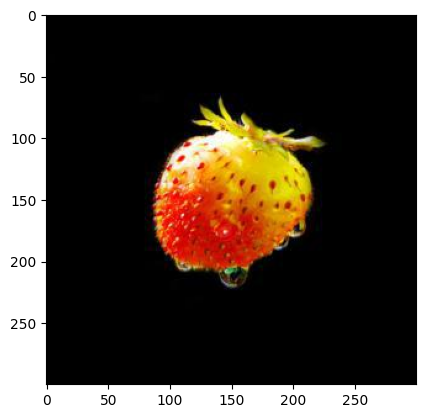

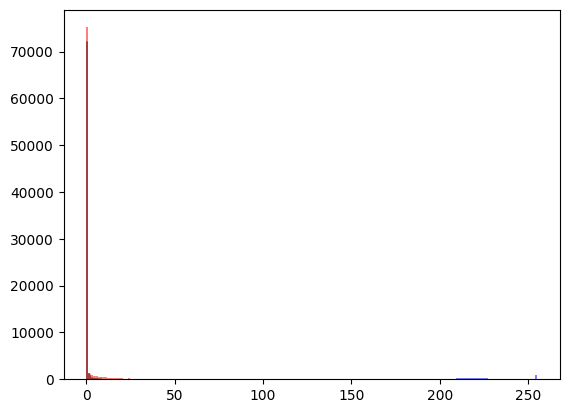

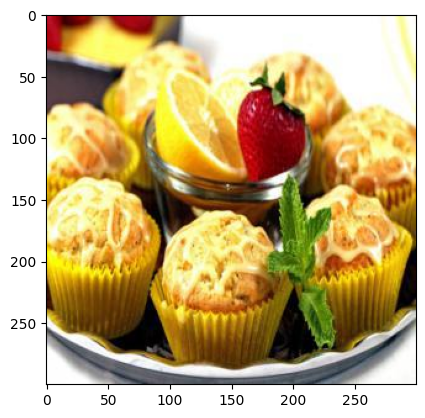

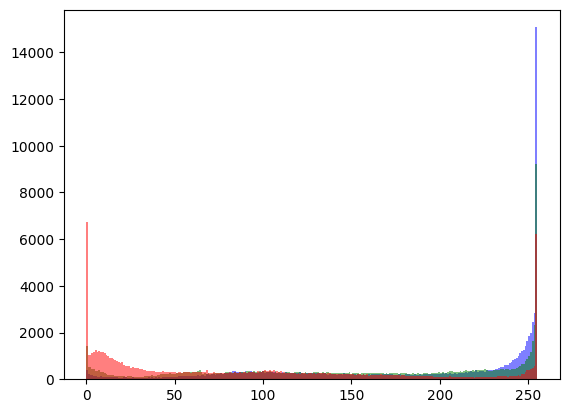

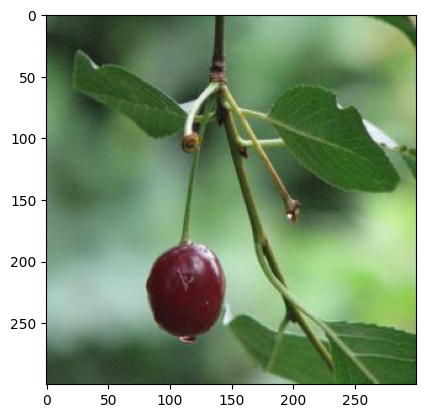

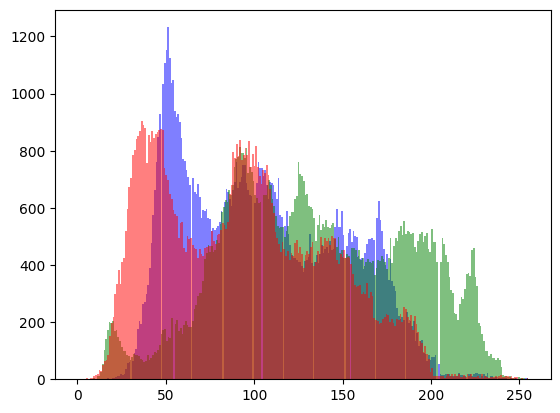

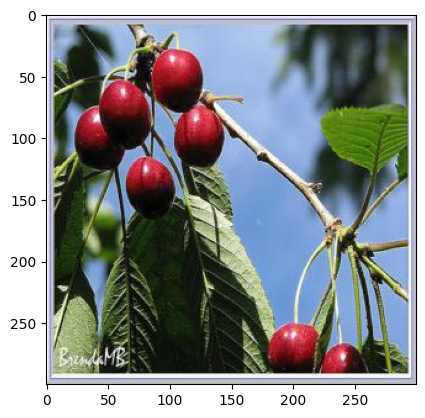

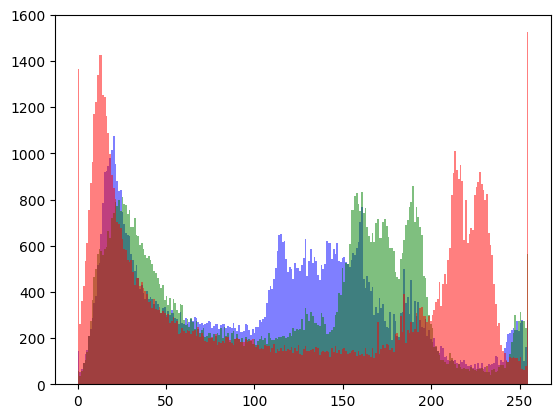

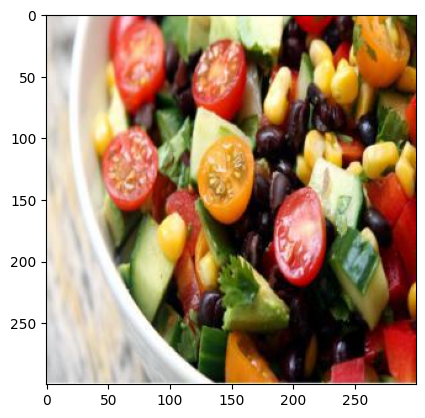

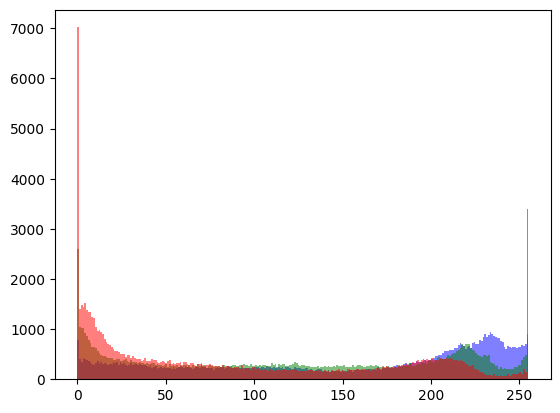

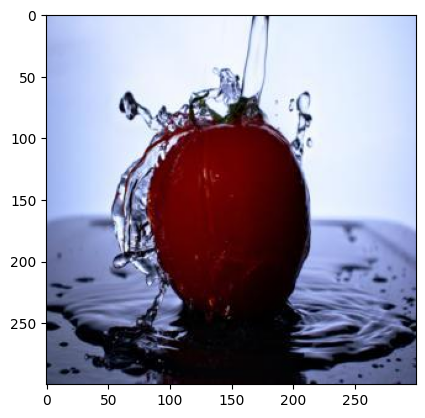

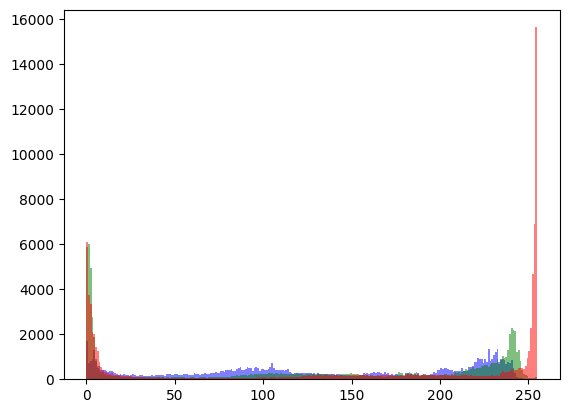

In [51]:
#Compare color channel distribution from two random images in each folder

for folder in os.listdir(config.RAW_DATA_DIR / 'train_data'):
    #Check folder is a directory
    if not os.path.isdir(config.RAW_DATA_DIR / 'train_data' / folder):
        continue

    for i in range(2):
        cvimage = cv2.imread(str(config.RAW_DATA_DIR / 'train_data' / folder / os.listdir(config.RAW_DATA_DIR / 'train_data' / folder)[i]))
        if cvimage is None:
            logger.error(f'Error reading image image in folder {folder}')
            continue
        #openCV reads images in BGR format, so we need to convert to RGB
        cvimage = cv2.cvtColor(cvimage, cv2.COLOR_BGR2RGB)
        plt.imshow(cvimage)
        plt.show()
        plt.hist(cvimage[:,:,0].ravel(), bins=256, color='Blue', alpha=0.5)
        plt.hist(cvimage[:,:,1].ravel(), bins=256, color='Green', alpha=0.5)
        plt.hist(cvimage[:,:,2].ravel(), bins=256, color='Red', alpha=0.5)
        plt.show()

In [46]:
#Plot distrubtition of each colour channel for each class

for folder in os.listdir(config.RAW_DATA_DIR / 'train_data'):
    #Check folder is a directory
    if not os.path.isdir(config.RAW_DATA_DIR / 'train_data' / folder):
        continue

    red = 0
    green = 0
    blue = 0
    for image in os.listdir(config.RAW_DATA_DIR / 'train_data' / folder):
        cvimage = cv2.imread(str(config.RAW_DATA_DIR / 'train_data' / folder / image))

        if cvimage is None:
            logger.error(f'Error reading image image in folder {folder}')
            continue

        red += np.mean(cvimage[:,:,0])
        green += np.mean(cvimage[:,:,1])
        blue += np.mean(cvimage[:,:,2])

    red /= num_images[folder]
    green /= num_images[folder]
    blue /= num_images[folder]

    logger.info(f'Average red value for {folder}: {red}')
    logger.info(f'Average green value for {folder}: {green}')
    logger.info(f'Average blue value for {folder}: {blue}')

    #Plot
    fig, ax = plt.subplots()
    ax.bar(['Red', 'Green', 'Blue'], [red, green, blue])
    ax.set_title(f'Average colour values for {folder}')
    ax.set_ylabel('Average Value')
    ax.set_xlabel('Colour Channel')
    plt.savefig(config.FIGURES_DIR / f'{folder}_average_colour_values.png')
    plt.close()


2024-10-28 11:11:46.849 | INFO     | __main__:<module>:26 - Average red value for strawberry: 94.23919277122742
2024-10-28 11:11:46.850 | INFO     | __main__:<module>:27 - Average green value for strawberry: 108.83167564432091
2024-10-28 11:11:46.850 | INFO     | __main__:<module>:28 - Average blue value for strawberry: 144.34567657205105
2024-10-28 11:11:48.181 | ERROR    | __main__:<module>:15 - Error reading image image in folder cherry
2024-10-28 11:11:51.306 | INFO     | __main__:<module>:26 - Average red value for cherry: 90.02432372274852
2024-10-28 11:11:51.306 | INFO     | __main__:<module>:27 - Average green value for cherry: 105.40699725599862
2024-10-28 11:11:51.306 | INFO     | __main__:<module>:28 - Average blue value for cherry: 139.00864915759044
2024-10-28 11:11:53.917 | INFO     | __main__:<module>:26 - Average red value for tomato: 74.70161503871152
2024-10-28 11:11:53.917 | INFO     | __main__:<module>:27 - Average green value for tomato: 99.75244987694721
2024-10-2

In [7]:
#Plot distrubtition of colour channels from 1-255 for each class

for folder in os.listdir(config.RAW_DATA_DIR / 'train_data'):
    #Check folder is a directory
    if not os.path.isdir(config.RAW_DATA_DIR / 'train_data' / folder):
        continue

    red = np.zeros(256)
    green = np.zeros(256)
    blue = np.zeros(256)
    for image in os.listdir(config.RAW_DATA_DIR / 'train_data' / folder):
        cvimage = cv2.imread(str(config.RAW_DATA_DIR / 'train_data' / folder / image))

        if cvimage is None:
            logger.error(f'Error reading image image in folder {folder}')
            continue

        red += np.histogram(cvimage[:,:,2], bins=256, range=(0, 256))[0]
        green += np.histogram(cvimage[:,:,1], bins=256, range=(0, 256))[0]
        blue += np.histogram(cvimage[:,:,0], bins=256, range=(0, 256))[0]

    red /= num_images[folder]
    green /= num_images[folder]
    blue /= num_images[folder]

    #Plot
    fig, ax = plt.subplots()
    ax.bar(np.arange(256), red, color='red', alpha=0.5, label='Red')
    ax.bar(np.arange(256), green, color='green', alpha=0.5, label='Green')
    ax.bar(np.arange(256), blue, color='blue', alpha=0.5, label='Blue')
    ax.set_title(f'Colour value distribution for {folder}')
    ax.set_ylabel('Average Value')
    ax.set_xlabel('Colour Channel')
    ax.legend()
    plt.savefig(config.FIGURES_DIR / f'{folder}_colour_value_distribution.png')
    plt.close()

2024-10-29 11:40:17.353 | ERROR    | __main__:<module>:15 - Error reading image image in folder cherry


In [48]:
#Plot the difference in distrubtition of colour channels from 1-255 for each class

for folder in os.listdir(config.RAW_DATA_DIR / 'train_data'):
    #Check folder is a directory
    if not os.path.isdir(config.RAW_DATA_DIR / 'train_data' / folder):
        continue

    red = np.zeros(256)
    green = np.zeros(256)
    blue = np.zeros(256)
    for image in os.listdir(config.RAW_DATA_DIR / 'train_data' / folder):
        cvimage = cv2.imread(str(config.RAW_DATA_DIR / 'train_data' / folder / image))

        if cvimage is None:
            logger.error(f'Error reading image image in folder {folder}')
            continue

        red += np.histogram(cvimage[:,:,0], bins=256, range=(0, 256))[0]
        green += np.histogram(cvimage[:,:,1], bins=256, range=(0, 256))[0]
        blue += np.histogram(cvimage[:,:,2], bins=256, range=(0, 256))[0]

    red /= num_images[folder]
    green /= num_images[folder]
    blue /= num_images[folder]

    #Plot
    fig, ax = plt.subplots()
    ax.bar(np.arange(256), red - np.mean(red), color='red', alpha=0.5, label='Red')
    ax.bar(np.arange(256), green - np.mean(green), color='green', alpha=0.5, label='Green')
    ax.bar(np.arange(256), blue - np.mean(blue), color='blue', alpha=0.5, label='Blue')
    ax.set_title(f'Colour value distribution difference from mean for {folder}')
    ax.set_ylabel('Average Value')
    ax.set_xlabel('Colour Channel')
    ax.legend()
    plt.savefig(config.FIGURES_DIR / f'{folder}_colour_value_distribution_difference.png')
    plt.close()

2024-10-28 11:18:47.744 | ERROR    | __main__:<module>:15 - Error reading image image in folder cherry
